In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import os
dir=os.getcwd()

In [3]:
defaultPars = {'figure.figsize': (5, 4),
               'lines.markersize' : 4,
               'axes.titlesize' : 13,
               'font.size' : 13,
               'axes.labelsize' : 16,
               'xtick.labelsize' : 13,
               'ytick.labelsize' : 13,
               'legend.fontsize' : 10,
               "text.usetex": True,
               "font.family": "sans-serif",
               "font.sans-serif": ["Helvetica"],
               'font.family':'Times New Roman', 
               'font.serif':'Times New Roman',
               "savefig.dpi" : 300,
               'contour.linewidth' : 2.0,
               'lines.linewidth' : 2.0,
               'axes.grid' : True,
               'grid.linewidth' : 0.5,
               'grid.color' : 'lightgray',
               'axes.axisbelow' : True
               }
plt.rcParams.update(defaultPars)

In [4]:
data = np.genfromtxt("XS_scans/Andre_scans/scan_run_[01-19].txt",names=True)
dataQ = np.genfromtxt("XS_scans/Andre_scans/scan_run_[20-38].txt",names=True)
dataJZ140 = np.genfromtxt("XS_scans/JZ_scans/scan_run_[01-19].txt",names=True)
dataJZ136 = np.genfromtxt("XS_scans/JZ_scans/scan_run_[20-38].txt",names=True)

In [5]:
#create plots folder
import pathlib
plots_dir='output_plots'
pathlib.Path(plots_dir).mkdir(parents=True, exist_ok=True) 

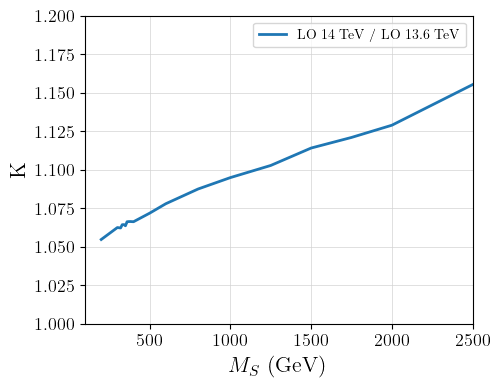

In [6]:
plt.plot(dataJZ136['mass55'],dataJZ140['cross']/dataJZ136['cross'],label='LO 14 TeV / LO 13.6 TeV')
plt.ylabel(r'K')
plt.xlabel(r'$M_S$ (GeV)')
plt.legend()
plt.xlim(100,2500)
plt.ylim(1.0,1.2)
plot_name='K_140_to_136.png'
plt.savefig(os.path.join(plots_dir,plot_name))

In [7]:
# N3LO XS from Higgs XSWG, 13 TeV and 14 TeV
dataHXSWG=np.genfromtxt("XS_scans/HXSWG/xsec_ggf.csv",delimiter=';',skip_header=3,names=True)

In [8]:
# NEW: limits on mixing angle
mixing_dir='limits_on_Higgs_mixing'
angle_files=['fig_1a_2409.06651_salp_neg.csv','fig_1a_2409.06651_salp_pos.csv','fig_5_1_2305.16169.csv']
legend=['2409.06651, $s_a < $ 0','2409.06651, $s_a >$ 0','2305.16169']
angle_limits=[]
for i in angle_files:
    angle_limits.append(np.genfromtxt(os.path.join(dir,mixing_dir,i),delimiter=',',names=True))
#os.path.join(dir,datadir,filename)

In [9]:
# obtain the "most constraining" and the "most relaxed" limits
from numpy import interp
xx=dataHXSWG['mH']
def f(mass,index):
    return interp(mass,angle_limits[index]["mSGeV"],abs(angle_limits[index]["sinalp"]))
max_values = [max(a,b,c) for a,b,c in zip(f(xx,0),f(xx,1),f(xx,2))]
min_values = [min(a,b,c) for a,b,c in zip(f(xx,0),f(xx,1),f(xx,2))]
A_limit = np.array((xx.tolist(),max_values)).transpose()
B_limit = np.array((xx.tolist(),min_values)).transpose()

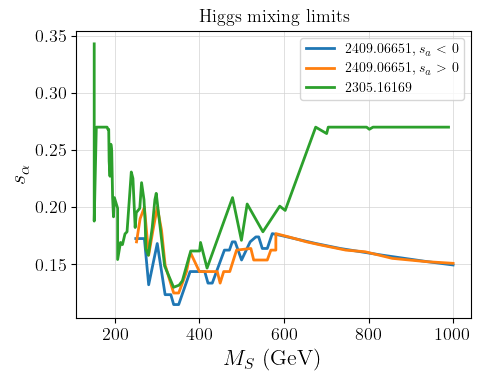

In [10]:
for i in range(3):
    plt.plot(angle_limits[i]["mSGeV"],abs(angle_limits[i]["sinalp"]),label=legend[i])
plt.legend()
plt.ylabel(r'$s_{\alpha}$')
plt.xlabel(r'$M_S$ (GeV)')
plt.title(r'Higgs mixing limits')
plt.tight_layout()
plot_name='Higgs_mixing_limits.png'
plt.savefig(os.path.join(plots_dir,plot_name))
#plt.ylim(0,0.4)
#plt.plot(angle_limits[0]["mSGeV"],abs(angle_limits[0]["sinalp"]))
#plt.plot(angle_limits[0]["mSGeV"],abs(angle_limits[0]["sinalp"]))

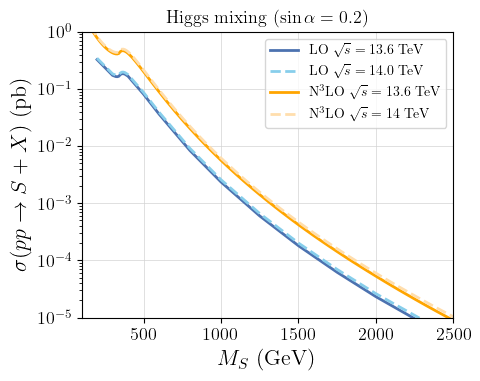

In [11]:
#plt.plot(data['mass55'],data['cross'],label=r'Higgs mixing ($\sin\alpha = 0.2$), $\sqrt{s}=13.6$ TeV', color='#4c72b0')
#plt.plot(dataQ['mass55'],dataQ['cross'],label=r'Heavy quark ($M_Q = 2$ TeV, $y_Q = 1$),  LO $\sqrt{s}=13.6$ TeV', color='skyblue')
#plt.plot(dataHXSWG['mH'],dataHXSWG['xs13']*pow(0.2,2), label=r'N$^3$LO 13 TeV ($\sin\alpha = 0.2$) ', color='red')
plt.plot(dataJZ136['mass55'],dataJZ136['cross'],label=r' LO $\sqrt{s}=13.6$ TeV', color='#4c72b0')
plt.plot(dataJZ140['mass55'],dataJZ140['cross'],'--',label=r'LO $\sqrt{s}=14.0$ TeV',color='skyblue')
y=np.interp(dataHXSWG['mH'],dataJZ136['mass55'],dataJZ136['cross']/dataJZ140['cross'])
plt.plot(dataHXSWG['mH'],dataHXSWG['xs14']*pow(0.2,2)*y, label=r'N$^3$LO $\sqrt{s}=13.6$ TeV  ', color='orange')
plt.plot(dataHXSWG['mH'],dataHXSWG['xs14']*pow(0.2,2),'--', label=r'N$^3$LO $\sqrt{s}=14$ TeV ', color='navajowhite')
plt.plot()
plt.yscale('log')
# plt.vlines(x=2*172.0,ymin=1e-2,ymax=3,linestyle='dashed',color='gray')
plt.legend()
plt.xlim(100,2500)
plt.ylim(1e-5,1)
plt.ylabel(r'$\sigma (p p \to S + X)$ (pb)')
plt.xlabel(r'$M_S$ (GeV)')
plt.title(r'Higgs mixing ($\sin\alpha = 0.2$)')
plt.tight_layout()
plot_name='xsecs_mS.png'
plt.savefig(os.path.join(plots_dir,plot_name))
plt.show()

In [12]:
q=np.array((dataHXSWG['mH'],dataHXSWG['xs14']*pow(0.2,2)*y))
a=np.transpose(q[:,4:])
np.savetxt('dummy.txt',a,header='mass[GeV],pp2s_N3LO_13.6TeV[pb]')
ref_xs=a

In [14]:
qmax=np.array((A_limit[:,0],dataHXSWG['xs14']*pow(A_limit[:,1],2)*y))
qmin=np.array((B_limit[:,0],dataHXSWG['xs14']*pow(B_limit[:,1],2)*y))
amax=np.transpose(qmax[:,4:])
amin=np.transpose(qmin[:,4:])
np.savetxt('dummy_max.txt',amax,header='mass[GeV],pp2s_N3LO_13.6TeV[pb]_max')
np.savetxt('dummy_min.txt',amin,header='mass[GeV],pp2s_N3LO_13.6TeV[pb]_min')

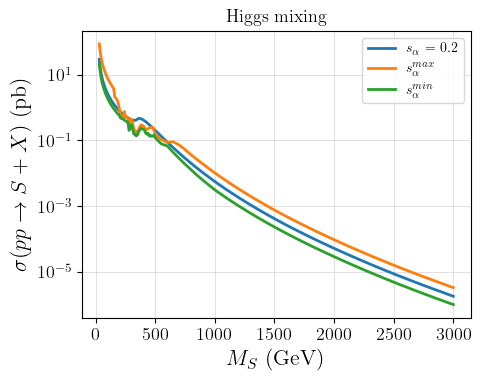

In [15]:
plt.plot(a[:,0],a[:,1],label=r'$s_{\alpha}$ = 0.2')
plt.plot(amax[:,0],amax[:,1],label=r'$s_{\alpha}^{max}$')
plt.plot(amin[:,0],amin[:,1],label=r'$s_{\alpha}^{min}$')
plt.yscale('log')
plt.legend()
plt.ylabel(r'$\sigma (p p \to S + X)$ (pb)')
plt.xlabel(r'$M_S$ (GeV)')
plt.title(r'Higgs mixing')
plt.tight_layout()
plot_name='xsecs_mS_with_mixing_limits.png'
plt.savefig(os.path.join(plots_dir,plot_name))
plt.show()

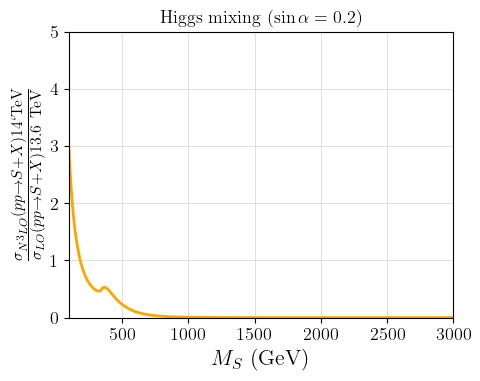

In [16]:
plt.plot(dataHXSWG['mH'],dataHXSWG['xs14']*pow(0.2,2)/y, label=r'N$^3$LO 14 TeV  ($\sin\alpha = 0.2$)', color='orange')
plt.xlim(100,3000)
plt.ylim(0,5)
plt.ylabel(r'$\frac{\sigma_{N^3LO} (p p \to S + X) 14`{\rm TeV} }{\sigma_{LO} (p p \to S + X)  13.6~{\rm TeV}}$')
plt.xlabel(r'$M_S$ (GeV)')
plt.title(r'Higgs mixing ($\sin\alpha = 0.2$) ')
plt.tight_layout()
plot_name='n3lo_over_lo.png'
plt.savefig(os.path.join(plots_dir,plot_name))
plt.show()

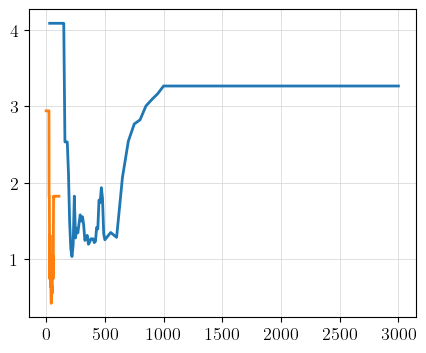

In [17]:
plt.plot(amax[:,0],amax[:,1]/amin[:,1],amax[:,1]/a[:,1])

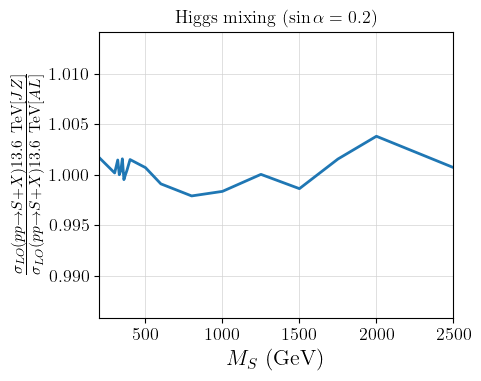

In [18]:
# to do: LO JZ vs LO AL
#y=np.interp(dataHXSWG['mH'],data['mass55'],data['cross'])
#plt.plot(dataHXSWG['mH'],dataHXSWG['xs14']*pow(0.2,2)/y, label=r'N$^3$LO 14 TeV  ($\sin\alpha = 0.2$)', color='orange')
#plt.plot()
plt.plot(dataJZ136['mass55'],dataJZ136['cross']/data['cross'],label=r'Higgs mixing ($\sin\alpha = 0.2$) [JZ]')
plt.xlim(200,2500)
plt.ylim(1.0-pow(5000,-0.5),1+pow(5000,-0.5))
plt.ylabel(r'$\frac{\sigma_{LO} (p p \to S + X) 13.6~{\rm TeV} [JZ] }{\sigma_{LO} (p p \to S + X)  13.6~{\rm TeV} [AL]}$')
plt.xlabel(r'$M_S$ (GeV)')
plt.title(r'Higgs mixing ($\sin\alpha = 0.2$) ')
plt.tight_layout()
plot_name='n3lo_over_lo.png'
plt.savefig(os.path.join(plots_dir,plot_name))
plt.show()

### Check cross-section ratio against analytical expressions

#### Analytical expressions

In [19]:
def F(x):
    tau = 1/x
    if tau > 1:
        f = np.arcsin(1/np.sqrt(tau))**2
    else:
        f = -(1./4.)*(np.log((1+np.sqrt(1-tau))/(1-np.sqrt(1-tau)))-np.pi*1j)**2
    r = (3.0/2)*tau*(1+(1-tau)*f)

    return r

In [20]:
MT = 172.0
MQ = 2e3
xT = (data['mass55']/(2*MT))**2
xQ = (data['mass55']/(2*MQ))**2
FT = list(map(F,xT))
FQ = list(map(F,xQ))

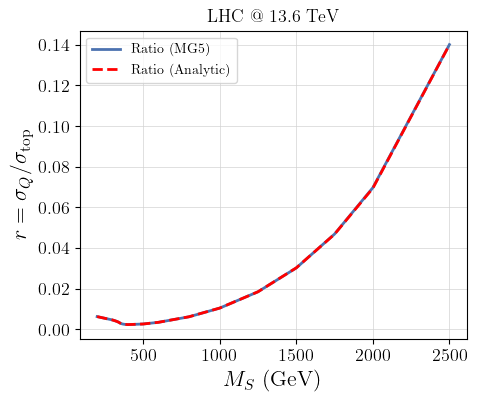

In [21]:
plt.plot(data['mass55'],dataQ['cross']/(data['cross']/0.2**2),label=r'Ratio (MG5)', color='#4c72b0')
plt.plot(data['mass55'],(np.absolute(FQ)/MQ)**2/((np.absolute(FT)/MT)**2),label=r'Ratio (Analytic)', color='red',linestyle='dashed')
plt.legend()
# plt.ylim(1e-3,1)
plt.ylabel(r'$r = \sigma_{Q}/\sigma_{\rm top}$')
plt.xlabel(r'$M_S$ (GeV)')
plt.title(r'LHC @ 13.6 TeV')
plt.show()

# Results from Tobias' study



In [22]:
stolen_plots_dir=os.path.join(dir,'plots_to_steal')

In [23]:
# getting the plots in the Notebook (optional, can be skipped)
# access to plots: just type plot1, plot2, plot3 or plot4 in any cell
from IPython.display import Image
img_file='eff_ctau.png'
plot1=Image(os.path.join(stolen_plots_dir,img_file))
img_file='eff_dm10.png'
plot2=Image(os.path.join(stolen_plots_dir,img_file))
img_file='evs_ctau.png'
plot3=Image(os.path.join(stolen_plots_dir,img_file))
img_file='evs_dm10.png'
plot4=Image(os.path.join(stolen_plots_dir,img_file))

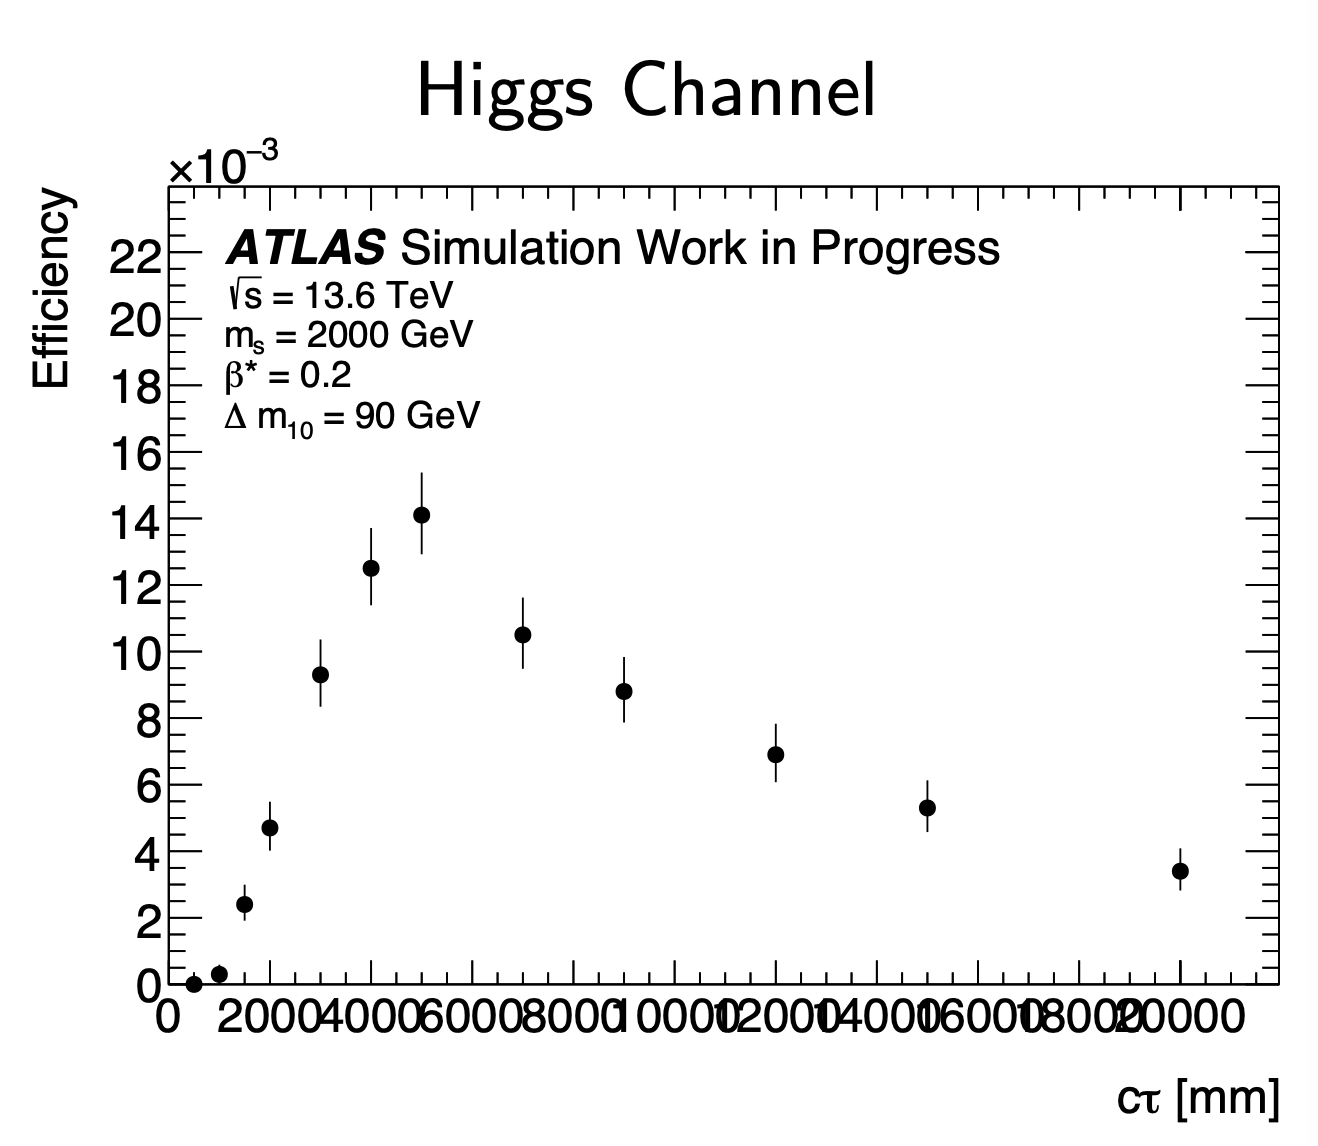

In [24]:
plot1

In [25]:
#importing plot data\
# note that efficiencies are given for mS=2 TeV, while ev counts given for mS=500 GeV
files=['eff_ctau.csv','eff_dm10.csv','evs_ctau.csv','evs_dm10.csv']
data_Tobias=[]
# files=['eff_ctau.csv','eff_dm10.csv']
for i in files:
    data_Tobias.append(np.genfromtxt(os.path.join(dir,stolen_plots_dir,i),delimiter=',',names=True))

In [26]:
# transforming Tobias' events counts (mS=500) into efficiency
# recall that N=Lumi*sigma_S*eff, so eff= N / (Lumi * sigma)
#according to the plot caption, Lumi=100 fb-1, sigma_S = 

In [62]:
eff_500_ctau=data_Tobias[2]['evs100fb1']/(100000*np.interp(500.0,ref_xs[:,0],ref_xs[:,1]))
eff_500_dm10=data_Tobias[3]['evs100fb1']/(100000*np.interp(500.0,ref_xs[:,0],ref_xs[:,1]))

In [94]:
np.savetxt(os.path.join(stolen_plots_dir,'eff_ms500_ctau.txt'),np.transpose(np.array((data_Tobias[2]['ctaumm'],eff_500_ctau))),header='ctau[mm],Efficiency')
np.savetxt(os.path.join(stolen_plots_dir,'eff_ms500_dm10.txt'),np.transpose(np.array((data_Tobias[3]['dm10GeV'],eff_500_dm10))),header='dm10[GeV],Efficiency')

Text(0.5, 1.0, 'LHC @ 13.6 TeV, $m_S = 500$ GeV, $\\Delta m_{10} = 90$ GeV')

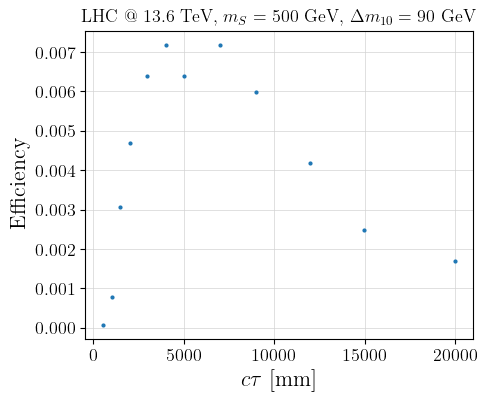

In [79]:
plt.plot(data_Tobias[2]['ctaumm'],eff_500_ctau,'.')
plt.ylabel('Efficiency')
plt.xlabel(r'$c \tau$ [mm]')
plt.title(r'LHC @ 13.6 TeV, $m_S = 500$ GeV, $\Delta m_{10} = 90$ GeV')


Text(0.5, 1.0, 'LHC @ 13.6 TeV, $m_S = 500$ GeV, $c \\tau = 4000$ mm')

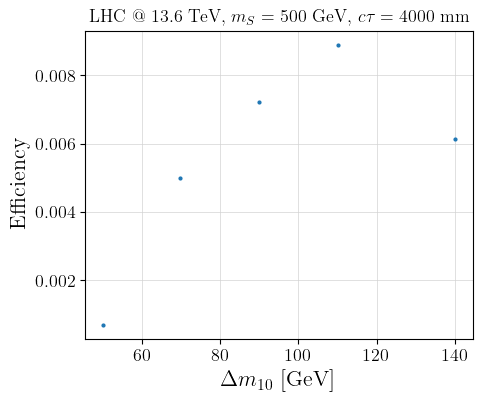

In [81]:
plt.plot(data_Tobias[3]['dm10GeV'],eff_500_dm10,'.')
plt.ylabel('Efficiency')
plt.xlabel(r'$\Delta m_{10}$ [GeV]')
plt.title(r'LHC @ 13.6 TeV, $m_S = 500$ GeV, $c \tau = 4000$ mm')

In [85]:
# This should be close to 7e-3, judging from slide #6 of Tobias' presentation.
(eff_500_dm10[2],eff_500_ctau[5])
# so all fine

(0.007228432944226763, 0.007189735838036695)

In [86]:
q2=np.array((dataHXSWG['mH'],dataHXSWG['xs14']*pow(0.2,2)*y))
a2=np.transpose(q[:,4:])
np.savetxt('hola.txt',a2,header='mass[GeV],pp2s_N3LO_13.6TeV[pb]')

In [87]:
a2

array([[3.00000000e+01, 2.93039408e+01],
       [3.50000000e+01, 2.00720237e+01],
       [4.00000000e+01, 1.47695503e+01],
       [4.50000000e+01, 1.14621420e+01],
       [5.00000000e+01, 9.24708876e+00],
       [5.50000000e+01, 7.68062130e+00],
       [6.00000000e+01, 6.52378698e+00],
       [6.50000000e+01, 5.63624852e+00],
       [7.00000000e+01, 4.93456213e+00],
       [7.50000000e+01, 4.36562722e+00],
       [8.00000000e+01, 3.89910059e+00],
       [8.50000000e+01, 3.50919053e+00],
       [9.00000000e+01, 3.17769112e+00],
       [9.50000000e+01, 2.89284438e+00],
       [1.00000000e+02, 2.64630592e+00],
       [1.05000000e+02, 2.43124852e+00],
       [1.10000000e+02, 2.24160355e+00],
       [1.15000000e+02, 2.07395740e+00],
       [1.20000000e+02, 1.92527574e+00],
       [1.25000000e+02, 1.79214497e+00],
       [1.30000000e+02, 1.67304793e+00],
       [1.35000000e+02, 1.56532959e+00],
       [1.40000000e+02, 1.46823136e+00],
       [1.45000000e+02, 1.38023609e+00],
       [1.500000